<a href="https://colab.research.google.com/github/abhishek18-blog/DataScience-and-ML/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the new CSV file
csv_file_path = '/content/sample_data/employeeData.csv'
df = pd.read_csv(csv_file_path)

print(f"Successfully loaded {csv_file_path}")
df.head()

Successfully loaded /content/sample_data/employeeData.csv


,age,salary,experience,education_level,target
0,22,20000,1,1,0
1,25,25000,2,2,0
2,23,30000,3,2,0
3,30,35000,4,2,0
4,32,40000,5,3,1


In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model with increased max_iter
model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter

# Fit the model to the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


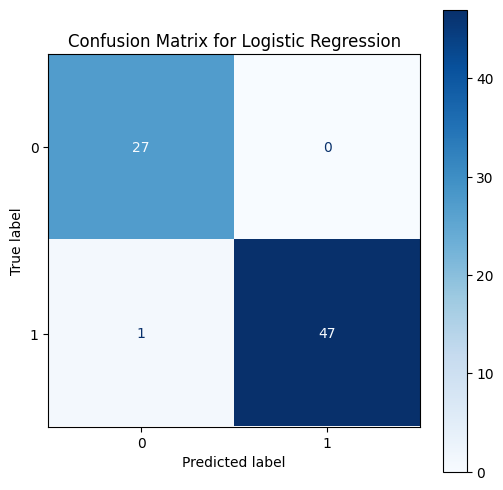

Confusion Matrix:
 [[27  0]
 [ 1 47]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the classes for the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues')
ax.set_title('Confusion Matrix for Logistic Regression')
plt.show()

print("Confusion Matrix:\n", cm)

In [ ]:
import plotly.express as px
import pandas as pd

# Get predicted probabilities for the positive class (target=1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Create a DataFrame for plotting
prob_df = X_test.copy()
prob_df['predicted_probability'] = y_pred_proba
prob_df['true_target'] = y_test.values

# Create the interactive scatter plot
fig = px.scatter(prob_df, x='experience', y='predicted_probability', color='true_target',
                 title='Probability of Selection vs. Experience',
                 labels={'experience': 'Experience (Years)',
                         'predicted_probability': 'Predicted Probability of Selection',
                         'true_target': 'True Target (0: Not Selected, 1: Selected)'},
                 hover_data=['age', 'salary', 'education_level'])

fig.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate Precision
precision = precision_score(y_test, y_pred)

# Calculate Recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9867
Precision: 1.0000
Recall: 0.9792
F1-score: 0.9895


In [ ]:
# Separate features (X) and target (y)
X = df[['age', 'salary', 'experience', 'education_level']]
y = df['target']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (248, 4)
Target (y) shape: (248,)


### Interactive 3D Scatter Plot of Features

**Reasoning**:
To provide an interactive 3D visualization, I will use `plotly.express` to create a 3D scatter plot. I'll select 'age', 'salary', and 'experience' as the three axes and color the points based on the 'target' variable to show how different classes are distributed in this 3D feature space.


In [ ]:
import plotly.express as px

# Create a 3D scatter plot of selected features, colored by the target variable
fig = px.scatter_3d(df, x='age', y='salary', z='experience', color='target',
                    title='3D Scatter Plot of Features by Target Class',
                    labels={'age': 'Age', 'salary': 'Salary', 'experience': 'Experience', 'target': 'Target (0: Not Selected, 1: Selected)'})

fig.show()

### Interactive 3D Scatter Plot for Training Data

**Reasoning**:
To visualize the training dataset in 3D, I will create an interactive scatter plot using `plotly.express`. I will use the 'age', 'salary', and 'experience' columns from the `X_train` DataFrame, and color the points based on the `y_train` target variable. This will help understand the distribution of the training data in a 3D feature space.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (173, 4)
X_test shape: (75, 4)
y_train shape: (173,)
y_test shape: (75,)


### Interactive 2D Scatter Plot of Predicted Classes

**Reasoning**:
To visualize the model's predictions in 2D, I will create an interactive scatter plot using `plotly.express`. I will select two prominent features, 'age' and 'salary', from the `X_test` DataFrame and color the points based on the model's predictions (`y_pred`). This will show how the model classifies data points in a 2D feature space.

### Interactive 3D Scatter Plot of Predicted Classes

**Reasoning**:
To visualize the model's predictions in 3D, I will create an interactive 3D scatter plot using `plotly.express`. I will use 'age', 'salary', and 'experience' from the `X_test` DataFrame and color the points based on the model's predictions (`y_pred`). This will provide a 3D perspective of how the model has classified the test data points.

In [ ]:
import plotly.express as px
import pandas as pd

# Create a DataFrame for test predictions for easier plotting
predicted_df_plot_3d = X_test.copy()
predicted_df_plot_3d['predicted_target'] = y_pred

# Create a 3D scatter plot of selected features, colored by the predicted target variable
fig_3d_pred = px.scatter_3d(predicted_df_plot_3d, x='age', y='salary', z='experience', color='predicted_target',
                            title='3D Scatter Plot of Predicted Classes (Age, Salary, Experience)',
                            labels={'age': 'Age', 'salary': 'Salary', 'experience': 'Experience', 'predicted_target': 'Predicted Target (0: Not Selected, 1: Selected)'})

fig_3d_pred.show()

## Final Task

### Subtask:
Summarize the findings from the model evaluation, including the interpretation of the confusion matrix, accuracy, precision, recall, and F1-score, and discuss the model's overall performance.


### Interactive 3D Scatter Plot for Testing Data

**Reasoning**:
To visualize the testing dataset in 3D, I will create an interactive scatter plot using `plotly.express`. I will use the 'age', 'salary', and 'experience' columns from the `X_test` DataFrame, and color the points based on the `y_test` target variable. This will help understand the distribution of the unseen test data in a 3D feature space.

In [ ]:
import plotly.express as px

# Create a DataFrame for testing data for easier plotting
test_df_plot = X_test.copy()
test_df_plot['target'] = y_test.values

# Create a 3D scatter plot of selected features for the testing data, colored by the target variable
fig = px.scatter_3d(test_df_plot, x='age', y='salary', z='experience', color='target',
                    title='3D Scatter Plot of Testing Features by Target Class',
                    labels={'age': 'Age', 'salary': 'Salary', 'experience': 'Experience', 'target': 'Target (0: Not Selected, 1: Selected)'})

fig.show()